# **Tesla Stock Price Prediction**

In [1]:
from IPython.display import HTML

HTML('''
<div style="display: flex; justify-content: space-between; align-items: flex-start; gap: 30px; margin: 20px 0; font-family: Georgia, 'Times New Roman', Times, serif;">
    <div style="flex: 1; min-width: 60%; max-width: 800px; padding-right: 20px;">
        <h2 style="color:#CC0000; border-bottom: 2px solid #000; padding-bottom: 5px; font-family: inherit;">
            Introduction | Введение
        </h2>
        
        <h3 style="font-family: inherit;">Problem Statement | Постановка задачи</h3>
        <div style="background: #F7F7F7; padding: 15px; border-radius: 5px; margin-bottom: 20px; font-size: 0.95em;">
            <div style="text-align: justify; color: #000000; line-height: 1.6;">
                <p style="margin: 0;">
                    <strong>EN:</strong>
                </p>
                
                <p style="margin: 15px 0 0 30px;">
                    Tesla, Inc., founded in 2003 by Martin Eberhard and Mark Tarpenning, 
                    has revolutionized the automotive industry under Elon Musk's leadership. Pioneer in electric vehicles 
                    (Roadster, Model S/X/3/Y, Cybertruck) and energy solutions. Expanding global manufacturing footprint 
                    with Gigafactories in US, China, and Germany. 2024-2025 targets: 2.5M vehicle production capacity, 
                    Full Self-Driving deployment, and $127B revenue projection despite Chinese market competition 
                    and stock volatility.
                </p>
                
                <p style="margin: 15px 0 0 30px;">
                    Predicting how much revenue a business can generate over a specific period is undoubtedly 
                    one of the most impactful capabilities enabled by machine learning models. 
                    Such predictions can assist in making informed investment decisions, analyzing market trends, 
                    and evaluating the potential risks and opportunities in the stock market. To leverage these benefits, 
                    this notebook will focus on building a forecasting model specifically for Tesla's closing stock prices.
                </p>

                <p style="margin: 15px 0 0 30px;">
                    The Close value (Close) is the last price at which a stock was traded during the trading day. It captures:<br>
                    - The final market agreement between buyers and sellers.<br>
                    - The support / resistance level for subsequent sessions.
                </p>

                <p style="margin: 15px 0 0;">
                    <strong>RU:</strong>
                </p>
                
                <p style="margin: 15px 0 0 30px;">
                    Tesla, Inc., основанная в 2003 году, совершила революцию 
                    в автомобильной промышленности под руководством Илона Маска. Лидер в производстве электромобилей 
                    (Roadster, Model S/X/3/Y, Cybertruck) и систем хранения энергии. Глобальная экспансия через 
                    крупные фабрики в США, Китае и Германии. Планы на 2024-2025: увеличение производства до 2.5 млн 
                    автомобилей, внедрение Full Self-Driving и рост выручки до $127 млрд, несмотря на рыночные вызовы.
                </p>

                <p style="margin: 15px 0 0 30px;">
                    Прогнозирование того, сколько дохода бизнес может получить за определенный период, безусловно, 
                    является одной из наиболее значимых возможностей, обеспечиваемых моделями машинного обучения. 
                    Такие прогнозы могут помочь в принятии обоснованных инвестиционных решений, анализе рыночных 
                    тенденций и оценке потенциальных рисков и возможностей на фондовом рынке.
                    Чтобы извлечь из этого пользу, в этом блокноте мы сосредоточимся на построении модели 
                    прогнозирования именно для цен акций Tesla на момент закрытия торгов.
                </p>

                <p style="margin: 15px 0 0 30px;">
                    Стоимость закрытия (Close) — это последняя цена, по которой акция торговалась в течение торгового дня. Она фиксирует:<br>
                    - Итоговое рыночное соглашение между покупателями и продавцами.<br>
                    - Уровень поддержки / сопротивления для последующих сессий.
                </p>
            </div>
        </div>
        
        <h3 style="font-family: inherit;">Data Description | Описание данных</h3>
        <div style="overflow-x: auto; margin: 20px 0; font-size: 0.9em;">
            <table style="width:100%; border-collapse: collapse; background: #FFF; font-family: inherit; border: 1px solid #000;">
                <tr style="background: #CC0000; color: white;">
                    <th style="padding: 12px; text-align: center; border: 1px solid #000;">Feature | Признак</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #000;">EN</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #000;">RU</th>
                </tr>
                <tr style="color: #000000; background: #FFFFFF;">
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;"><strong>Date</strong></td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">The trading date (YYYY-MM-DD format)</td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Дата торгов в формате ГГГГ-ММ-ДД</td>
                </tr>
                <tr style="color: #000000; background: #FFFFFF;">
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;"><strong>Open</strong></td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Opening price at market open</td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Цена открытия торгов</td>
                </tr>
                <tr style="color: #000000; background: #FFFFFF;">
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;"><strong>High</strong></td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Highest price during the day</td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Максимальная цена за день</td>
                </tr>
                <tr style="color: #000000; background: #FFFFFF;">
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;"><strong>Low</strong></td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Lowest price during the day</td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Минимальная цена за день</td>
                </tr>
                <tr style="color: #000000; background: #FFFFFF;">
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;"><strong>Close</strong></td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Closing price at market close</td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Цена закрытия торгов</td>
                </tr>
                <tr style="color: #000000; background: #FFFFFF;">
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;"><strong>Volume</strong></td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Total shares traded daily</td>
                    <td style="padding: 12px; text-align: center; border: 1px solid #000;">Общий объем торгов за день</td>
                </tr>
            </table>
        </div>
    </div>

    <div style="flex: 0 0 35%; max-width: 600px; margin-left: 20px;">
        <video autoplay loop muted playsinline style="width:100%; height:auto; border-radius: 8px;">
            <source src="https://digitalassets.tesla.com/tesla-contents/video/upload/f_auto,q_auto:best/Homepage-We-Are-Tesla-Mobile.mp4" type="video/mp4">
        </video>
    </div>
</div>
''')

Feature | Признак,EN,RU
Date,The trading date (YYYY-MM-DD format),Дата торгов в формате ГГГГ-ММ-ДД
Open,Opening price at market open,Цена открытия торгов
High,Highest price during the day,Максимальная цена за день
Low,Lowest price during the day,Минимальная цена за день
Close,Closing price at market close,Цена закрытия торгов
Volume,Total shares traded daily,Общий объем торгов за день


# **What is Time Series?**

Time Series is a set of observations on the values that a variable takes at different times. For example: Sales Trend, Stock Market Price, Weather Forecast etc.
Time Series is using to predict the future values based on the previous obseved value.

Components of Time Series:

* Trend : Tend may show the growth or decline in a time series over a long period. This is the type of tendency which continues to persist for a very long period. Prices and export and import data, for example, reflect obviously increasing tendencies over time.
* Seasonality : These are short term movements occurring in data due to seasonal factors. The short term is generally considered as a period in which changes occur in a time series with variations in weather or festivities
* Irregularity : These are sudden changes occurring in a time series which are unlikely to be repeated. They are components of a time series which cannot be explained by trends, seasonal or cyclic movements. These variations are sometimes called residual or random components.
* Cyclic : These are long term oscillations occurring in a time series. These oscillations are mostly observed in economics data and the periods of such oscillations are generally extended from five to twelve years or more. These oscillations are associated with the well known business cycles. 



---

Временной ряд — это набор наблюдений за значениями переменной в разные моменты времени. Например: тренд продаж, цены на фондовом рынке, прогноз погоды и т.д.
Временные ряды используются для прогнозирования будущих значений на основе предыдущих наблюдений.

Основные компоненты временного ряда:





- Тренд (Trend): Отражает долгосрочное увеличение или уменьшение значений ряда. Например, рост цен на недвижимость или увеличение объёмов экспорта/импорта с течением времени.
- Сезонность (Seasonality): Краткосрочные колебания, вызванные сезонными факторами (погода, праздники, времена года). Например, рост продаж зимней одежды в холодные месяцы или спад активности в туристическом секторе в низкий сезон.
- Нерегулярность (Irregularity): Внезапные, непредсказуемые изменения, которые не повторяются. Эти колебания нельзя объяснить трендом, сезонностью или циклами. Например, резкий скачок цен из-за политических событий или природных катастроф.
- Циклические колебания (Cyclic): Долгосрочные колебания, связанные с экономическими или бизнес-циклами (периоды роста и спада). Продолжительность таких циклов обычно составляет от 5 до 12 лет. Например, колебания ВВП или инвестиционной активности.

<a id="1.2"></a>
# **Metric**

**To evaluate the quality of the forecast, we will use MAPE (Mean Absolute Percentage Error) – the mean absolute percentage error | Для оценки качества прогноза будем использовать MAPE (Mean Absolute Percentage Error) – среднюю абсолютную процентную ошибку:**



$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)}}{y_{\text{true}}^{(i)}} \right| \times 100\%
$$


 **Variables Definition | Определение переменных:**
- \\( n \\): the number of observations | количество наблюдений.

- \\( y_{\text{true}}^{(i)} \\): the true value for the ii-th observation | истинное значение для ii-го наблюдения.

- \\( y_{\text{pred}}^{(i)} \\): the predicted value for the ii-th observation | предсказанное значение для ii-го наблюдения.




Using **MAPE**, it is possible to compare different models with each other and evaluate how accurately and to what extent a model makes predictions for different time series. If the actual values of the time series are close to 0, the Mean Absolute Percentage Error value can be close to infinity. The direction of the error (whether the prediction is above or below the actual value) affects the **MAPE** value. Essentially, it's an **inverse measure of forecasting accuracy**.

---

С помощью **MAPE** возможно сравнивать различные модели между собой, оценивать, как и на сколько модель делает точные прогнозы для разных временных рядов. Если фактические значения временного ряда близки к 0, то значение средней абсолютной процентной погрешности может быть близким к бесконечности. На значение **MAPE** влияет направление ошибки (преобразование выше или ниже фактического значения). По сути, данная метрика - это **обратная величина для точности прогнозирования**.

# **Import | Импорт библиотек 📚**

In [2]:
import os
import warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings('ignore')

/kaggle/input/tesla-stock-data-2025/TSLA_2010-06-29_2025-02-13.csv
/kaggle/input/tesla-stock-data-st/mian.csv


In [3]:
import datetime
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation, performance_metrics

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [8]:
RANDOM_SEED = 64911002
np.random.seed(RANDOM_SEED)

# **Load Data | Импорт данных 💾**

Initially, the '**Date**' feature is in **datetime** format, since we don't need to use time in the current task, data will be load **without time zone marks** and sorted by '**Date**'.

---

Признак '**Date**', изначально, представлен в формате **datetime**, но, так как в текущей задаче не требуется использовать время, то данные будут загружены **без указания часового пояса** и сортировкой по '**Date**'.

In [9]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-st/mian.csv', 
                 parse_dates = ['Date'], 
                 date_parser = lambda x: pd.to_datetime(x).tz_localize(None),
                 index_col='Date')
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


Check the Time Range for Integrity | Проверим временной диапазон

In [10]:
print(f"Time Range | Период:  {df.index.min().date()} - {df.index.max().date()}")

Time Range | Период:  2010-06-29 - 2024-12-24


In [11]:
print(f"Data Information | Информация о данных:\n'{df.info}'")
print(f"Statistics | Статистики:\n'{df.describe}'")

Data Information | Информация о данных:
'<bound method DataFrame.info of              Adj Close       Close        High         Low        Open  \
Date                                                                     
2010-06-29    1.592667    1.592667    1.666667    1.169333    1.266667   
2010-06-30    1.588667    1.588667    2.028000    1.553333    1.719333   
2010-07-01    1.464000    1.464000    1.728000    1.351333    1.666667   
2010-07-02    1.280000    1.280000    1.540000    1.247333    1.533333   
2010-07-06    1.074000    1.074000    1.333333    1.055333    1.333333   
...                ...         ...         ...         ...         ...   
2024-12-18  440.130005  440.130005  488.540009  427.010010  466.500000   
2024-12-19  436.170013  436.170013  456.359985  420.019989  451.880005   
2024-12-20  421.059998  421.059998  447.079987  417.640015  425.510010   
2024-12-23  430.600006  430.600006  434.510010  415.410004  431.000000   
2024-12-24  462.279999  462.279999  462

The analyzed time series spans from June 29, 2010, to December 24, 2024, covering over 14 years of data. This allows for identifying both short-term fluctuations and long-term trends (3,648 observations in total), with no missing data. The most striking observation is the enormous price growth. For instance, prices ranged from 1–2 dollars in 2010 but surged to 460 $ by 2024. This reflects exceptionally high and dynamic demand for the company's products, driven by Tesla's success in scaling production, expanding into new markets (e.g., China, Europe), and pioneering technological innovations.

---

Рассматриваемый временной ряд охватывает период с 29 июня 2010 года по 24 декабря 2024 года, что даёт более 14 лет данных. Это позволяет выявить как краткосрочные колебания, так и долгосрочные тренды (суммарно: 3648 наблюдений), пропуски отсутствуют. Первое, что бросается в глаза — огромный рост цен. Например, в 2010 году они достигали от 1-2 долларов, а к 2024 году взлетели до 460 долларов, что свидетельствует о высоком и динамическом росте спроса на продукцию компании, а именно из-за успеха Tesla в масштабировании производства, выходом на новые рынки (Китай, Европа) и технологическими инновациями.

# **Time Series Analysis & Decomposition | Анализ и разложение временного ряда 🕵**

Visualization of a Time Series with the Mean Value of the Target Feature  | Визуализация временного ряда со средним значением целевого признака 

In [12]:
mean_close = df['Close'].mean()


fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index,
                         y = df['Close'],
                         name = 'Close | Стоимость закрытия',
                         line = dict(color = '#CC0000')))

fig.add_trace(go.Scatter(x = df.index,
                         y = [mean_close] * len(df),
                         mode = 'lines',
                         line = dict(color = '#000000', dash = 'dash'),
                         name = f'Mean: ${mean_close:.2f} | Среднее: {mean_close:.2f}$'))

fig.update_layout(title = 'Tesla Stock Price History (2010-2024) | История цен акций Tesla (2010-2024)',
                  xaxis_title = 'Date | Дата',
                  yaxis_title = 'Close | Стоимость закрытия',
                  height = 800,
                  template = 'plotly_white',
                  legend = dict(orientation = "h",
                                yanchor = "bottom",
                                y = 1.02))
fig.show();

The graph demonstrates a clear upward trend, which could be linked to the company's successful strategy, overall market growth, profitability, and consequently, an increase in investor interest and stock popularity. However, it is important to consider that the growth is uneven, with periods of stagnation and sharp spikes (notably from early 2020). This may be attributed to annual seasonality, where specific months see increased or decreased investor activity. Additionally, a hypothesis can be proposed that regular seasonal surges in autumn or winter may depend on reporting periods or expectations of major events (e.g., the announcement or release of a new electric vehicle model). To further analyze this, time series decomposition should be applied to isolate trends and seasonal patterns.

---

График демонстрирует чёткий восходящий тренд, что потенциально может быть связано с успешной стратегией компании, общим ростом рынка и прибыли, а соответственно, и увеличением числа инвесторов и популярности акций. Однако необходимо учитывать тот факт, что рост неравномерен, присутствуют как периоды стагнации, так и резкие скачки (с начала 2020 года). Это можно обусловить наличием годовой сезонности, когда в определённые месяцы наблюдается повышение или понижение активности инвесторов, также, допустимо выдвинуть гипотезу о том, что регулярные осенние или зимние подъемы зависят от отчетых периодов или ожиданий крупных событий (например, анонс / выпуск новой модели электомобиля). Следует использовать декомпозицию временного ряда для выделения трендов и сезонности.

Decomposition of the Time Series | Декомпозиция временного ряда

In [13]:
result = seasonal_decompose(df['Close'], model='additive', period = 365)


fig = make_subplots(rows = 4, cols = 1, shared_xaxes = True, vertical_spacing = 0.05, subplot_titles = 
                    ["Observed | Исходный ряд",
                     "Trend | Тренд",
                     "Seasonal | Сезонность",
                     "Residual | Остатки"])

fig.add_trace(go.Scatter(x = result.seasonal.index, 
                         y = result.observed,
                         line = dict(color = '#CC0000', width = 1),
                         name = 'Observed'), row = 1, col = 1)

fig.add_trace(go.Scatter(x = result.trend.index,
                         y = result.trend,
                         line = dict(color = '#CC0000', width = 1.5),
                         name ='Trend'), row = 2, col = 1)

fig.add_trace(go.Scatter(x = result.seasonal.index,
                         y = result.seasonal,
                         line = dict(color = '#CC0000', width = 1),
                         name = 'Seasonal'), row = 3, col = 1)

fig.add_trace(go.Scatter(x = result.resid.index,
                         y = result.resid,
                         line = dict(color = '#CC0000', width = 1),
                         name ='Residual'), row = 4, col = 1)

fig.update_layout(title = ("Additive Seasonal Decomposition (period=365) | "
                           "Аддитивная сезонная декомпозиция (период=365)"
                          ),
                  height = 1000,
                  showlegend = False,
                  template = 'plotly_white',
                  margin = dict(t = 100),
                  grid = dict(rows = 4,
                              columns = 1,
                              pattern = 'independent'))

for i in range(1,5):
    fig.update_yaxes(showgrid = True, 
                     gridcolor = 'rgba(0,0,0,0.15)', 
                     row = i, 
                     col = 1)
    fig.update_xaxes(showgrid = True,
                     gridcolor = 'rgba(0,0,0,0.15)',
                     row = i,
                     col = 1)
fig.show();

1. Observed (Original Series):
    - Dynamics: The observed series shows a clear upward trend from 2010 to 2024, with exponential growth. This aligns with the company's successful expansion and market penetration.
    - Volatility: High volatility is evident, especially during specific periods such as 2018–2020 (influenced by Elon Musk's tweets and the COVID-19 pandemic) and 2021–2022 (Tesla's inclusion in the S&P 500 and stock splits).
2. Trend:
    - Growth: The trend component confirms a long-term upward movement, consistent with Tesla's achievements in scaling production and entering new markets.
    - Acceleration: Post-2020, the growth rate accelerates, likely due to increased interest in electric vehicles and technological innovations.
The trend supports the hypothesis of hypergrowth typical for tech companies.
3. Seasonal:
    - Amplitude: Seasonal fluctuations are significant, with an amplitude of approximately ±200 units, indicating substantial seasonal effects.
    - Peaks: Occur at the end of the year (Q4), possibly linked to quarterly reports and pre-holiday expectations.
    - Troughs: Appear mid-year (Q2), potentially due to seasonal demand drops or post-report corrections.
Confirms the hypothesis of seasonality tied to quarterly reporting and macroeconomic cycles.
4. Residual:
    - Spread: Residuals fluctuate within ±0.5, suggesting relatively low noise levels.
    - Anomalies: Some outliers (e.g., 2018 and 2020) may be attributed to exogenous events like Elon Musk's tweets and the pandemic.
Validates the presence of exogenous factors not explained by trend and seasonality.

---

1. *Наблюдаемый ряд*:
    - Динамика: Исходный ряд показывает четкий восходящий тренд с 2010 по 2024 год, характеризующийся экспоненциальным ростом. Это согласуется с успешным расширением компании и выходом на новые рынки.
    - Волатильность: Высокая волатильность наблюдается в определенные периоды, такие как 2018–2020 (влияние твитов Илона Маска и пандемия COVID-19) и 2021–2022 (включение Tesla в индекс S&P 500 и сплит акций).
2. *Тренд*:
    - Рост: Компонента тренда подтверждает долгосрочное восходящее движение, что соответствует успехам Tesla в масштабировании производства и выходе на новые рынки.
    - Ускорение: После 2020 года темпы роста ускоряются, вероятно, из-за растущего интереса к электромобилям и технологическим инновациям.
Таким образом, тренд подтверждает гипотезу о гиперросте, характерном для технологических компаний.
3. *Сезонность*:
    - Амплитуда: Сезонные колебания значительны, с амплитудой около ±200 единиц, что указывает на сильное влияние сезонных факторов.
    - Пики: Наблюдаются в конце года (Q4), возможно, из-за квартальной отчетности и предновогодних ожиданий.
    - Спады: Приходятся на середину года (Q2), возможно, из-за сезонного снижения спроса или коррекции после отчетов.
Подтверждается гипотеза о сезонности, связанной с квартальной отчетностью и макроэкономическими циклами.
4. *Остатки*:
    - Разброс: Остатки колеблются в диапазоне ±0.5, что указывает на относительно низкий уровень шума.
    - Аномалии: Некоторые выбросы (например, в 2018 и 2020 годах) могут быть связаны с экзогенными событиями, такими как твиты Илона Маска и пандемия.
Подтверждается наличие экзогенных факторов, которые не объясняются трендом и сезонностью.

Plot a graph to analyze the distribution of prices and their autocorrelation, which demonstrates the shape of the data distribution and the presence of temporal dependence. The density plot helps to identify outliers and modal values, while autocorrelation shows the degree of relationship between current and previous values.

---

Построим график для анализа распределения цен и их автокорреляции, который продемонстрирует форму распределения данных и наличие временной зависимости. График плотности распределения помогает выявлять выбросы и модальные значения, а автокорреляция показывает степень связи между текущими и предыдущими значениями.

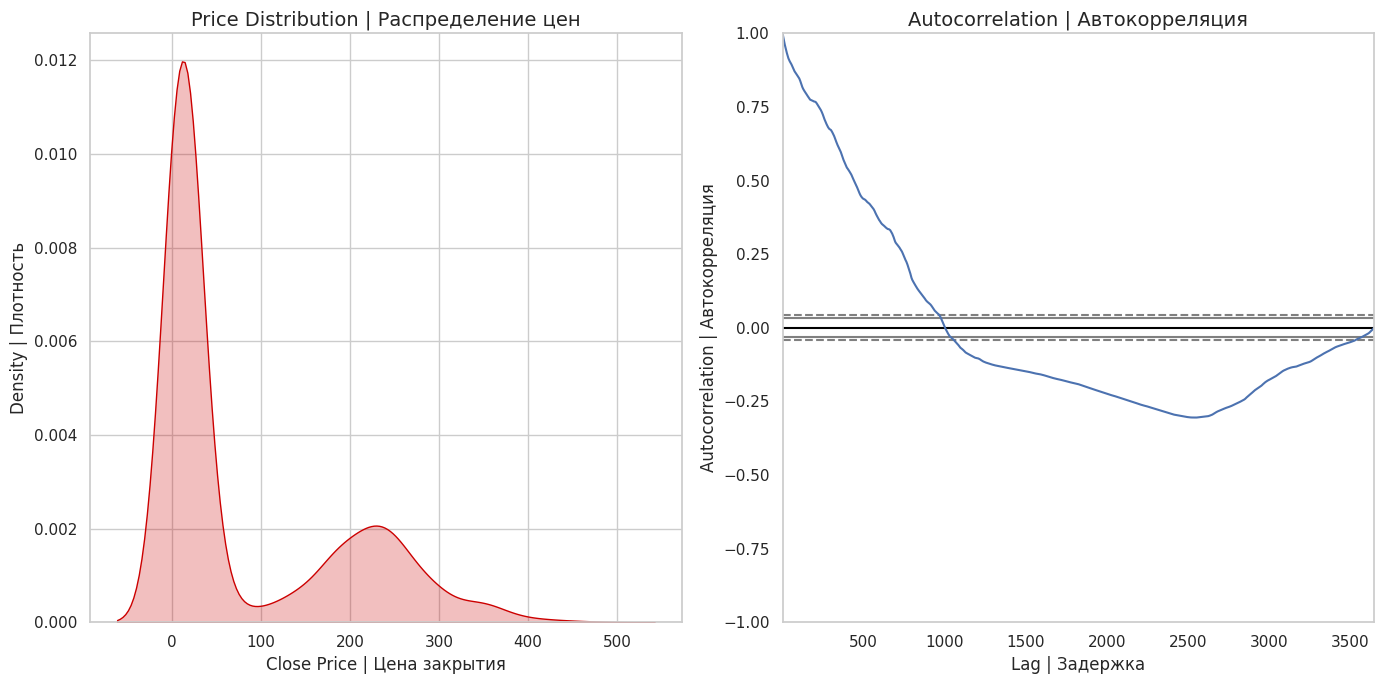

In [14]:
sns.set(style = "whitegrid")


plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.kdeplot(df['Close'], color = '#CC0000', shade = True)
plt.title('Price Distribution | Распределение цен', fontsize = 14)
plt.xlabel('Close Price | Цена закрытия', fontsize = 12)
plt.ylabel('Density | Плотность', fontsize = 12)

plt.subplot(1, 2, 2)
sns.lineplot(data = pd.plotting.autocorrelation_plot(df['Close']).get_lines()[0].get_data()[1], 
             color = '#CC0000')
plt.title('Autocorrelation | Автокорреляция', fontsize = 14)
plt.xlabel('Lag | Задержка', fontsize = 12)
plt.ylabel('Autocorrelation | Автокорреляция', fontsize = 12)
plt.tight_layout()
plt.show();

1. The price distribution is not normal: it is asymmetric and exhibits multiple peaks. The primary peak near zero suggests a high concentration of prices within this range. A long right tail indicates the presence of outliers or high-value prices. The distribution may be bi-modal or multi-modal, potentially reflecting different market regimes (e.g., varying market conditions or stock groupings).





The distribution is skewed and could follow a log-normal or exponential pattern. The presence of outliers or multiple modes necessitates further analysis.




2. Autocorrelation is high at initial lags (positive values), indicating long-term dependence in the data. However, it subsequently declines, reaches negative values, and later rises again. The horizontal dashed lines represent confidence intervals; if the autocorrelation line crosses these boundaries, the dependency is statistically significant.




The time series exhibits autocorrelation, suggesting trends or seasonal patterns. It's recommended to test for stationarity and consider differencing if needed.

---

1. Распределение цен не является нормальным: оно асимметрично и имеет несколько пиков: основной
около 0, что может свидетельствовать о высокой концентрации цен в данном диапазоне.
Присутствует длинный правый хвост, что указывает на наличие выбросов или значений с высокой стоимостью.
Возможны два модальных значения (би-модальное или мультимодальное распределение), что может говорить о наличии двух разных режимов в данных (например, разные рыночные состояния или группы акций).



Распределение цен является несимметричным и может быть лог-нормальным или экспоненциальным. В данных есть выбросы или несколько режимов, что требует дополнительного анализа.





2. На начальных лагах корреляция высокая (положительная), что говорит о наличии долгосрочной зависимости в данных, тем не менее, впоследствии автокорреляция снижается, достигая отрицательных значений, после чего вновь увеличивается. Горизонтальные пунктирные линии указывают на доверительный интервал: если линия автокорреляции выходит за эти границы, значит, зависимость статистически значима.





Временной ряд демонстрирует автокорреляцию, что указывает на наличие тренда или сезонных паттернов.Рекомендуется проверить стационарность ряда и использовать метод дифференцирования.

Create a Copy of the Original Dataframe | Создадим копию исходного датафрейма

In [15]:
df_arima = df.copy()
df_prophet = df.reset_index()[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})
df_xgboost = df.copy()

# **ARIMA 🚂**

ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting
An ARIMA model is characterized by 3 terms: p, d, q
where p is the order of the AR term, q is the order of the MA term and d is the number of differencing required to make the time series stationary.
If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.


Autoregressive Integrated Moving Average is a model for non-stationary time series that combines three components:

* AR(p) : Autoregression of order p (linear dependence on past values),
* I(d) : Differencing of order d (to achieve stationarity by removing trends/seasonality),
* MA(q) : Moving Average of order q (dependence on past forecast errors).

---


ARIMA означает авторегрессионное интегрированное скользящее среднее. Существуют сезонные и несезонные модели ARIMA, которые могут использоваться для прогнозирования.
Модель ARIMA характеризуется тремя параметрами: p, d, q , где:

p — порядок авторегрессии (AR),
d — порядок дифференцирования (I), необходимый для стационарности ряда,
q — порядок скользящего среднего (MA).
Если временной ряд имеет сезонные паттерны , добавляются сезонные компоненты, и модель становится SARIMA (Seasonal ARIMA). 

ARIMA (Autoregressive Integrated Moving Average) - модель для нестационарных временных рядов, 
сочетающая:
- AR(p): Авторегрессия порядка p
- I(d): Дифференцирование порядка d
- MA(q): Скользящее среднее порядка q

We determine the model parameters (p, d, q) by analyzing the autocorrelation (ACF) and partial autocorrelation (PACF) functions, and then generate a forecast for the next calendar year.

---

Мы определяем параметры модели (p, d, q) с использованием анализа автокорреляционной (ACF) и частичной автокорреляционной (PACF) функций, а затем построим прогноз на следующий календарный год.

Stationarity Test | Проверка стационарности

In [16]:
result = adfuller(df_arima['Close'])
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: 0.2976036610144194, p-value: 0.9772342763094785


p-value > 0.5, hence the series is non-stationary, differentiation is required.

---

p-value > 0.5, следовательно ряд нестационарен, требуется дифференцирование.

To select ARIMA parameters, it is necessary to analyze the autocorrelation structure. For this purpose, we apply differencing
d=1 to eliminate trends and then plot the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function). Differencing with d=1 removes trends in the data. The ACF and PACF plots help determine the autoregressive order (p) and moving average order (q).

---

Для выбора параметров ARIMA, необходимо изучить автокорреляционную структуру, для этого применяем дифференцирование (d = 1) для устранения тренда, а затем строим ACF и PACF. Дифференцирование с d = 1 устраняет тренд в данных. Графики ACF и PACF помогают определить порядки авторегрессии (p) и скользящего среднего (q).

In [17]:
diff_arima = df_arima['Close'].diff().dropna()
acf_vals = acf(diff_arima, nlags = 30)
pacf_vals = pacf(diff_arima, nlags = 30)


fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], 
                        name='Original Series | Исходный ряд'))
fig.add_trace(go.Scatter(x=diff_arima.index, y=diff_arima, 
                        name='First Difference | 1-й порядок дифференцирования'))
fig.update_layout(title='Stationarity Check | Проверка стационарности', 
                  height=500)
fig.show();

In [18]:
fig_acf = go.Figure(data = go.Scatter(x = list(range(len(acf_vals))),
                                      y = acf_vals, 
                                      mode = 'lines+markers'))
fig_acf.update_layout(title = 'ACF for the differenced series (d=1) | ACF для дифференцированного ряда (d=1)',
                      xaxis_title = 'Lag | Лаг',
                      yaxis_title = 'ACF')
fig_acf.show();

In [19]:
fig_pacf = go.Figure(data = go.Scatter(x = list(range(len(pacf_vals))),
                                       y = pacf_vals,
                                       mode = 'lines+markers'))
fig_pacf.update_layout(title = 'PACF for the differenced series (d=1) | PACF для дифференцированного ряда (d=1)',
                       xaxis_title = 'Lag | Лаг',
                       yaxis_title = 'PACF')
fig_pacf.show();

After first-order differencing (d=1), the series becomes visually stationary. Therefore, the optimal ARIMA parameters are:

**ARIMA(2, 1, 2):**

* PACF cuts off at lag 2 → AR(p) = 2
* ACF decays exponentially → MA(q) = 2

---

После 1-го дифференцирования ряд визуально стабилизируется, следовательно, оптимальными параметрами для ARIMA будут:


**ARIMA(2, 1, 2):**
* PACF обрывается на лаге 2 → AR(p)=2
* ACF экспоненциально затухает → MA(q)=2


**Training of ARIMA(2,1,2) model**

---

**Обучение модели ARIMA(2,1,2)**

In [20]:
model_arima = ARIMA(df_arima['Close'].dropna(), order = (2,1,2))
results_arima = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [21]:
forecast_arima = results_arima.get_forecast(steps = 30)
forecast_index = pd.date_range(start = df_arima.index[-1], periods = 31, freq = 'B')[1:]
forecast_arima = forecast_arima.predicted_mean
print(forecast_arima)

3648    463.045856
3649    463.752477
3650    464.406573
3651    465.009917
3652    465.568573
3653    466.083723
3654    466.560876
3655    467.000713
3656    467.408266
3657    467.783787
3658    468.131904
3659    468.452503
3660    468.749863
3661    469.023560
3662    469.277577
3663    469.511222
3664    469.728224
3665    469.927667
3666    470.113060
3667    470.283295
3668    470.441695
3669    470.586988
3670    470.722336
3671    470.846330
3672    470.961993
3673    471.067798
3674    471.166651
3675    471.256924
3676    471.341421
3677    471.418430
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_arima.index, y = df_arima['Close'], name = ' Historical Data | Исторические данные'))
fig.add_trace(go.Scatter(x = forecast_index, y = forecast_arima, name = 'ARIMA Forecast | Прогноз ARIMA'))
fig.update_layout(title = 'ARIMA: Closing Price Forecast | Прогноз цен закрытия Tesla', yaxis_title = 'Price | Цена')
fig.show();

# **Prophet 🤖**

Prophet is an open source Time Series Forecasting Algorithm from Facebook and it designed for ease of use without expert knowledge on Time Series Forecasting or Statistics. Time Series Forecasting builds model by finding a best smooth line which can be represented as sum of the following component:

* Overal Growth Trend
* early Seasonality
* Weekly Seasonality 
* Holiday Affects

Benefit of Prophet Approach:

* Uneven time interval between data is not a problem
* Day with NA is not a problem
* Seasonality with multiple periods (Week & Year) is handled by default
* Works well by default setting, parameters are easily interpretable


Prophet requires the variable names in the time series to be:

* y – Target
* ds – Datetime



---

Prophet — это алгоритм с открытым исходным кодом для прогнозирования временных рядов, разработанный компанией Facebook. Он предназначен для простоты использования без необходимости наличия экспертных знаний в области прогнозирования временных рядов или статистики. Модель прогнозирования временных рядов строится путём нахождения оптимальной сглаженной линии, которая может быть представлена как сумма следующих компонентов:

* Общий тренд роста
* Годовая сезонность
* Недельная сезонность
* Влияние праздников


Преимущества подхода Prophet:

* Неравномерные временные интервалы между данными не являются проблемой.
* Пропуски данных (NA) не являются проблемой.
* Сезонность с несколькими периодами (недельная и годовая) учитывается по умолчанию.
* Хорошо работает с настройками по умолчанию, а параметры легко интерпретируются.




Для работы алгоритма названия переменных в временном ряду должны быть:

* y — целевая переменная (значение, которое нужно прогнозировать),

* ds — метка времени (datetime).

Train the model with weekly, daily and yearly seasonality considerations | Обучим модель с учетом недельной, дневной и годовой сезонностями

In [23]:
model_prophet = Prophet(yearly_seasonality = True,
                        weekly_seasonality = True,
                        daily_seasonality = True,
                        seasonality_mode = 'multiplicative',
                        interval_width = 0.95).fit(df_prophet)

10:42:46 - cmdstanpy - INFO - Chain [1] start processing
10:42:49 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future_prophet = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future_prophet)
print(forecast_prophet)

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-06-29  -0.167783  -49.784417   53.205845    -0.167783    -0.167783   
1    2010-06-30  -0.167892  -54.433252   52.783582    -0.167892    -0.167892   
2    2010-07-01  -0.168001  -55.063030   54.177998    -0.168001    -0.168001   
3    2010-07-02  -0.168110  -53.046661   57.363021    -0.168110    -0.168110   
4    2010-07-06  -0.168546  -52.509730   54.476899    -0.168546    -0.168546   
...         ...        ...         ...         ...          ...          ...   
3673 2025-01-19 -26.366244  113.311795  223.920593   -26.460971   -26.275943   
3674 2025-01-20 -26.360096  155.649520  264.600011   -26.473104   -26.254343   
3675 2025-01-21 -26.353947  155.985776  261.058073   -26.471634   -26.228624   
3676 2025-01-22 -26.347798  149.047984  259.552715   -26.470061   -26.207128   
3677 2025-01-23 -26.341650  150.640971  259.985108   -26.475016   -26.186322   

        daily  daily_lower  daily_upper

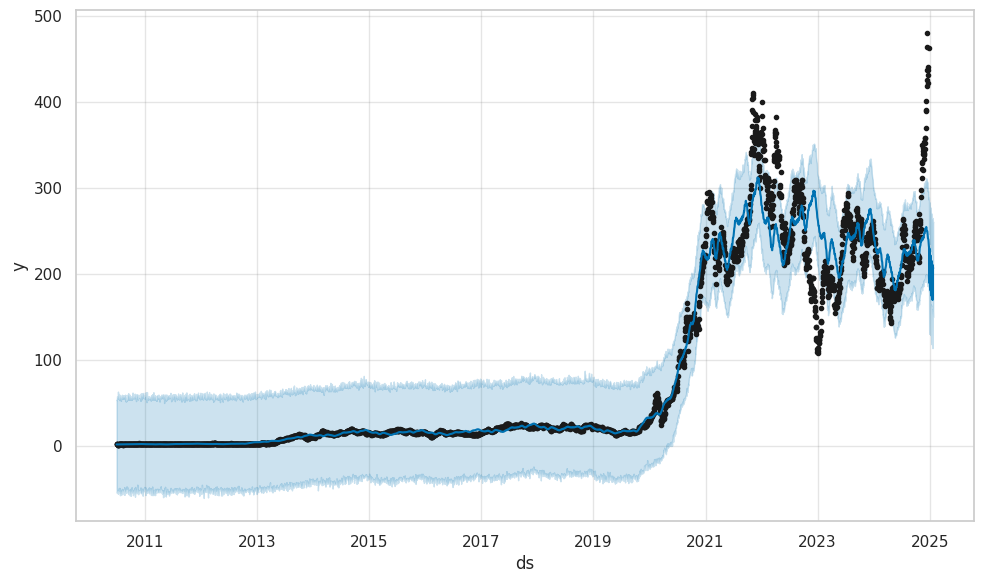

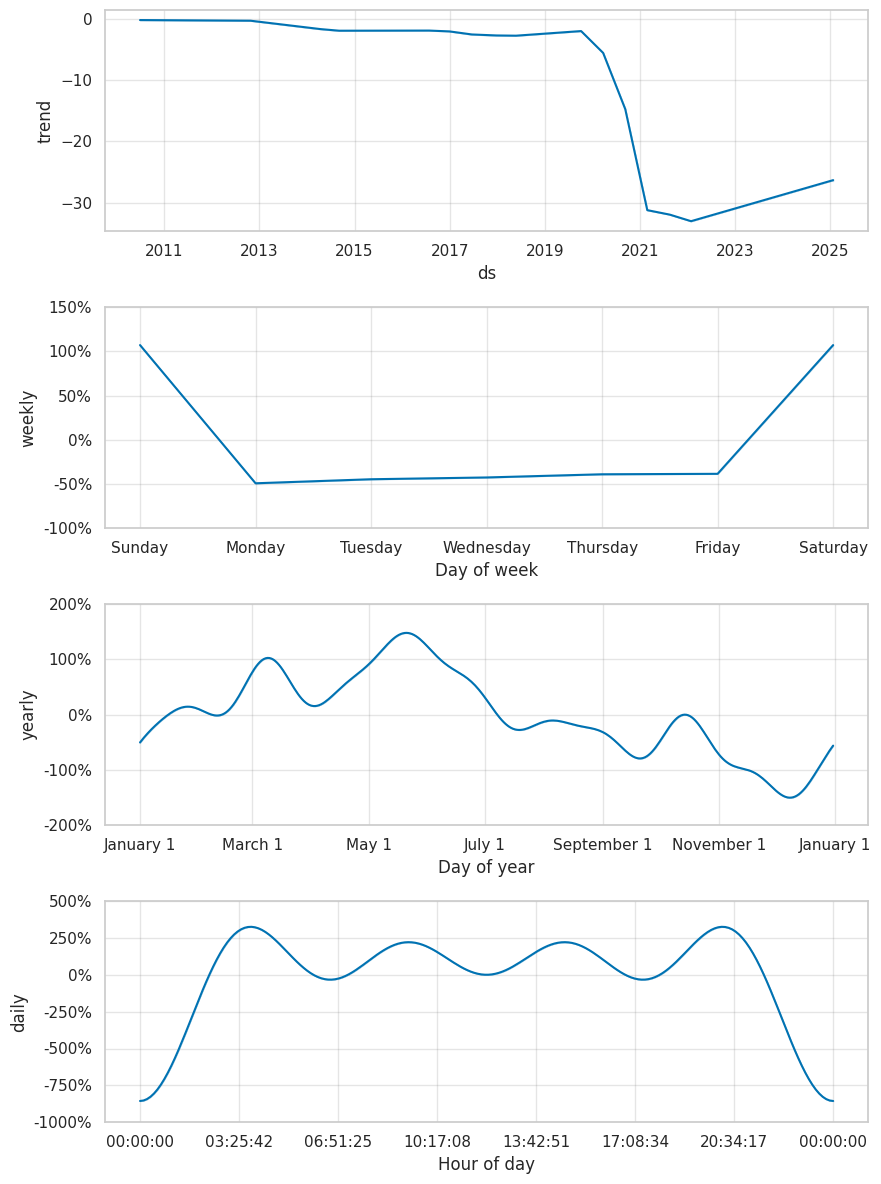

In [25]:
fig = model_prophet.plot(forecast_prophet)
fig = model_prophet.plot_components(forecast_prophet)

The Prophet model successfully identified the primary upward trend in the data, characterized by exponential growth in Tesla stock prices. This trend is expected to continue over the next 30 days, though volatility remains high.

* Weekly seasonality: Stock prices tend to rise at the start of the week and decline toward the weekend.
* Yearly seasonality: Prices peak mid-year and reach lows at the end of the year, likely due to quarterly financial reports.
* Daily seasonality: Prices increase during the first half of the trading day and decline in the evening.

---

Модель Prophet успешно выявила основной восходящий тренд в данных, который характеризуется экспоненциальным ростом цен акций Tesla. Данный тренд продолжится в ближайшие 30 дней, хотя волатильность остается высокой.
* Недельная сезонность : Цены акций имеют тенденцию расти в начале недели и снижаться к концу недели.
* Годовая сезонность : Цены достигают максимумов в середине года и минимумов в конце года, вероятно, из-за квартальных отчетов.
* Дневная сезонность : Цены растут в первой половине дня и снижаются вечером.


Defining Time Limits for MAPE | Определение временных границ для MAPE

In [26]:
df_full = pd.read_csv('/kaggle/input/tesla-stock-data-2025/TSLA_2010-06-29_2025-02-13.csv', index_col='Date', parse_dates=True)


last_train_date = '2024-12-24'
forecast_start_date = pd.Timestamp(last_train_date) + pd.Timedelta(days=1)
forecast_dates = pd.bdate_range(start=forecast_start_date, periods=34, freq='B')
forecast_end_date = forecast_dates[-1]


y_true_df = df_full.loc[forecast_start_date:forecast_end_date, 'Close']
y_true = y_true_df.values
print(len(y_true))

30


In [27]:
mape_arima = mean_absolute_percentage_error(y_true, forecast_arima[-30:])
prophet_forecast = forecast_prophet.set_index('ds').loc[forecast_start_date:forecast_end_date, 'yhat']
mape_prophet = mean_absolute_percentage_error(y_true, prophet_forecast)

In [28]:
print(mape_arima)
print(mape_prophet)

0.1703460123303241
0.48280603244177644


In [29]:
mape_scores = {'ARIMA': mape_arima,
               'Prophet': mape_prophet}

fig = go.Figure([go.Bar(x=list(mape_scores.keys()), y=list(mape_scores.values()))])
fig.update_layout(title='Model comparison by MAPE (30-day forecast) | Сравнение моделей по MAPE (30-дневный прогноз)',
                  yaxis_title='MAPE',
                  yaxis=dict(range=[0, 1])
)
fig.show();

ARIMA demonstrates a lower MAPE (Mean Absolute Percentage Error) compared to Prophet, therefore its forecasts can be trusted with greater confidence than those of Prophet.

---

ARIMA демонстрирует более низкое значение MAPE по сравнению с Prophet, следовательно ее прогнозам можно доверять с большей уверенностью, нежели к Prophet.

# **Summary | Вывод**

ARIMA, as a model based on autoregressive and moving average components, effectively handles linear dependencies and stationary processes. If the Tesla time series achieved stationarity after differencing (e.g., with parameter d=1), ARIMA could accurately capture residual patterns such as short-term correlations or local trends. Unlike Prophet, which focuses on decomposing the series into trend, seasonality, and holiday effects, ARIMA in this case may better capture the linear component of price growth without "overloading" the model with redundant seasonal components.


However, the series clearly exhibited seasonality (quarterly dynamics), but in Tesla stock price movements, seasonal fluctuations are unstable (e.g., their amplitude and phase change over time). Prophet’s automatic tuning of seasonal components may lead to overfitting on historical patterns. For example, during periods of sharp price surges (such as 2020–2021 due to the pandemic, Elon Musk’s tweets, or new technology releases), Prophet might erroneously extrapolate outdated seasonal trends, while ARIMA, by ignoring explicit seasonality, focuses on local changes. Prophet uses additive or multiplicative decomposition, which can be sensitive to outliers, especially in the trend component. For instance, abnormal price spikes caused by news about Tesla’s technological breakthroughs or speculative waves could distort Prophet’s trend estimation. ARIMA, particularly with differencing, is more robust to such outliers because they are "smoothed out" when transitioning to series increments.


Advantages and Use Cases


* ARIMA:
Preferred for short-term forecasts with clear linear dynamics, especially when the time series is close to stationary after transformations (e.g., predicting stock prices in stable market conditions where the key driver is momentum from past changes, not external events). Limitation: Requires careful manual tuning of parameters (p,d,q), making it less flexible for data with evolving structures.


* Prophet:
Strengths: Handling long-term series with multiple seasonalities (e.g., yearly, quarterly, weekly cycles) and adapting to structural breaks (e.g., trend shifts due to Tesla entering new markets). Automatically accounts for holidays and events, which is critical for forecasting retail sales or tourism activity. Weakness: In high-volatility, low-seasonality environments like Tesla stock prices, its advantages may not justify the model’s complexity.

---

ARIMA, как модель, основанная на авторегрессионных и скользящих средних компонентах, эффективно работает с линейными зависимостями и стационарными процессами. Если временной ряд Tesla после дифференцирования (например, с параметром d=1) приобрел стационарность, ARIMA смогла точно зафиксировать остаточные паттерны, такие как краткосрочные корреляции или локальные тренды. В отличие от Prophet, который фокусируется на декомпозиции ряда на тренд, сезонность и праздничные эффекты, ARIMA в данном случае могла лучше уловить линейную составляющую роста цен, не "перегружая" модель избыточными сезонными компонентами.

Тем не менее, ряд явно обладал сезонностью (квартальная динамика), но в динамике цен акций Tesla сезонные колебания носят нестабильный характер (например, их амплитуда и фаза меняются со временем), автоматическая настройка сезонных компонент в Prophet может привести к переобучению на исторических паттернах. Например, в периоды резких скачков цен (как в 2020–2021 гг. из-за пандемии, твитов Илона Маска или выпуска новых технологий) Prophet мог ошибочно экстраполировать старые сезонные тренды, в то время как ARIMA, игнорируя явную сезонность, сфокусировалась на локальных изменениях. Prophet использует аддитивную или мультипликативную декомпозицию, которая может быть чувствительна к выбросам, особенно в трендовой компоненте. Например, аномальные пики цен из-за новостей о технологических прорывах Tesla или спекулятивных волн могли исказить оценку тренда Prophet. ARIMA же, особенно с использованием дифференцирования, более устойчива к таким выбросам, так как они "сглаживаются" при переходе к приращениям ряда.


Преимущества и области применения моделей:


* ARIMA:
Модель предпочтительна для краткосрочных прогнозов с четко выраженной линейной динамикой, особенно когда временной ряд близок к стационарному после преобразований. Например, прогнозирование цен на акции в условиях стабильного рынка, где ключевым фактором является инерция предыдущих изменений (а не внешние события). Однако ARIMA требует тщательной ручной настройки параметров (p,d,q), что делает её менее гибкой для данных с меняющейся структурой.


* Prophet:
Сильная сторона Prophet — обработка длительных временных рядов с множественными сезонностями (например, годовые, квартальные, недельные циклы) и адаптация к структурным изменениям (например, смена тренда из-за выхода Tesla на новый рынок). Она также автоматически учитывает праздничные дни и события, что критично для прогнозирования розничных продаж или туристической активности. Однако в условиях высокой волатильности и слабой сезонности, как в случае с акциями Tesla, её преимущества могут не окупить сложность модели.

# **Suggestions | Рекомендации**

To enhance the accuracy of Tesla stock price forecasting, a hybrid approach leveraging the strengths of multiple models and data sources is recommended. Prophet is particularly effective for long-term forecasts (e.g., 1–5 years) due to its ability to capture seasonal patterns, quarterly reports, and macroeconomic cycles. Conversely, ARIMA is better suited for short-term predictions (1–30 days), especially when the time series exhibits stable linear dynamics, as its parameters can be fine-tuned to local correlations and volatility.

Incorporating exogenous factors (e.g., the COVID-19 pandemic, Elon Musk’s tweets, USD exchange rates, or company fundamentals) can significantly improve model robustness. For instance, adding binary features indicating days when Musk tweeted about Tesla or indices reflecting pandemic-related economic uncertainty can help account for anomalous price spikes. These variables can be integrated into Prophet via regressors or used as additional features in gradient boosting models.

A hybrid model combining Prophet, ARIMA, and gradient boosting (e.g., XGBoost) offers an optimal solution:

Prophet estimates long-term trends and seasonality.
ARIMA adjusts short-term residuals, capturing linear dependencies.
XGBoost aggregates forecasts from both models and accounts for nonlinear effects of external factors (e.g., news sentiment or macroeconomic indicators).
This approach mitigates the limitations of individual models: Prophet compensates for ARIMA’s weak adaptability to non-stationarity, while gradient boosting captures complex interactions between variables. Such a framework ensures robustness across varying market conditions and forecast horizons, making it particularly valuable for volatile assets like Tesla stock.

---

Для улучшения точности прогнозирования цен акций Tesla рекомендуется использовать комбинированный подход, объединяющий сильные стороны различных моделей и данных. Во-первых, модель Prophet демонстрирует наибольшую эффективность для долгосрочных прогнозов (например, 1–5 лет), где критически важны учёт сезонных паттернов, квартальных отчётов и макроэкономических циклов. В свою очередь, ARIMA предпочтительна для краткосрочных прогнозов (1–30 дней), особенно в условиях стабильной линейной динамики, так как её параметры могут быть тонко настроены на локальные корреляции и волатильность.

Интеграция экзогенных факторов (таких как пандемия COVID-19, твиты Илона Маска, курс доллара или фундаментальные показатели компании) способна существенно повысить робастность моделей. Например, добавление бинарных признаков, отражающих дни публикации твитов Маска, или индексов экономической неопределённости, связанных с пандемией, позволит учесть аномальные скачки цен. Для этого можно использовать Prophet с регрессорами или расширить признаковое пространство в градиентном бустинге.

Гибридная модель , сочетающая Prophet, ARIMA и градиентный бустинг (например, XGBoost), может стать оптимальным решением. Например:

Prophet оценивает долгосрочный тренд и сезонность.
ARIMA корректирует краткосрочные остатки, улавливая линейные зависимости.
XGBoost агрегирует прогнозы обеих моделей и учитывает нелинейные эффекты от внешних факторов (например, sentiment-анализ новостей или макроэкономические индикаторы).
Такой подход позволяет устранить ограничения отдельных моделей: Prophet компенсирует слабую адаптивность ARIMA к нестационарности, а градиентный бустинг учитывает сложные взаимодействия между переменными.

# **References | Источники**



1. [Autoregressive Integrated Moving Average Model](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

2. [ARIMA Model for Time-Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting/notebook)

3. [Time Series Analysis and Forecasting Reliance](https://www.kaggle.com/code/yashvi/time-series-analysis-and-forecasting-reliance)

4. [Time Series Analysis and Forecasts with Prophet](https://www.kaggle.com/code/elenapetrova/time-series-analysis-and-forecasts-with-prophet)

5. [Time Series Forecasting with Prophet](https://www.kaggle.com/code/robikscube/time-series-forecasting-with-prophet)

6. [MAPE](https://arize.com/blog-course/mean-absolute-percentage-error-mape-what-you-need-to-know/)

